In [24]:
# Import statements
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense

In [3]:
# Getting data
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 4us/step


In [4]:
train_data.shape

(404, 13)

In [5]:
test_data.shape

(102, 13)

In [10]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [15]:
# Preparing the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [17]:
# Function that generates a keras model
def build_model():
    model = Sequential()
    model.add(Dense(64,activation='relu',input_dim=train_data.shape[1]))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

In [22]:
# Trying on a single model
model = build_model()
history = model.fit(train_data,train_targets,epochs=20,batch_size=10,validation_split=0.2)

Train on 323 samples, validate on 81 samples
Epoch 1/20
323/323 [==============================] - 0s 564us/step - loss: 480.9455 - mean_absolute_error: 19.8808 - val_loss: 449.4250 - val_mean_absolute_error: 19.1896
Epoch 2/20
323/323 [==============================] - 0s 71us/step - loss: 291.4911 - mean_absolute_error: 14.7452 - val_loss: 229.0211 - val_mean_absolute_error: 12.6819
Epoch 3/20
323/323 [==============================] - 0s 68us/step - loss: 121.2983 - mean_absolute_error: 8.4376 - val_loss: 92.7689 - val_mean_absolute_error: 7.0638
Epoch 4/20
323/323 [==============================] - 0s 71us/step - loss: 57.2625 - mean_absolute_error: 5.4402 - val_loss: 55.8784 - val_mean_absolute_error: 5.4610
Epoch 5/20
323/323 [==============================] - 0s 71us/step - loss: 38.8060 - mean_absolute_error: 4.3592 - val_loss: 38.0657 - val_mean_absolute_error: 4.5511
Epoch 6/20
323/323 [==============================] - 0s 74us/step - loss: 29.9218 - mean_absolute_error: 3.77

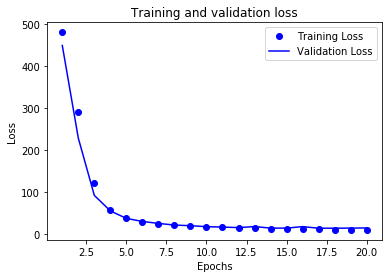

In [25]:
plt.clf()

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs,loss_values,'bo',label='Training Loss')
plt.plot(epochs,val_loss_values,'b',label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

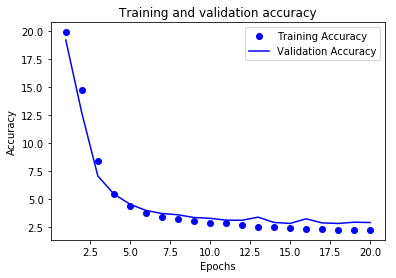

In [28]:
plt.clf()

acc_values = history_dict['mean_absolute_error']
val_acc_values = history_dict['val_mean_absolute_error']

plt.plot(epochs,acc_values,'bo',label='Training Accuracy')
plt.plot(epochs,val_acc_values,'b',label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
(loss, error) = model.evaluate(test_data,test_targets)

102/102 [==============================] - 0s 20us/step


In [30]:
print(f'Loss : {loss}')
print(f'Error : {error}')

Loss : 23.92411983714384
Error : 3.24365281123741


In [37]:
# k-Fold Validation implementation | tracking post training validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #',i)
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[: i * num_val_samples], train_data[(i + 1) * num_val_samples : ]],axis=0)
    partial_train_targets = np.concatenate([train_targets[: i * num_val_samples], train_targets[(i + 1) * num_val_samples : ]],axis=0)
    model = build_model()
    model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=1)
    val_mse, val_mae = model.evaluate(val_data,val_targets)
    all_scores.append(val_mae)

processing fold # 0
Epoch 1/100
303/303 [==============================] - 0s 1ms/step - loss: 259.8099 - mean_absolute_error: 12.4917
Epoch 2/100
303/303 [==============================] - 0s 579us/step - loss: 29.6469 - mean_absolute_error: 3.7527
Epoch 3/100
303/303 [==============================] - 0s 583us/step - loss: 21.5818 - mean_absolute_error: 3.1583
Epoch 4/100
303/303 [==============================] - 0s 586us/step - loss: 19.1021 - mean_absolute_error: 2.8679
Epoch 5/100
303/303 [==============================] - 0s 635us/step - loss: 16.9794 - mean_absolute_error: 2.6891
Epoch 6/100
303/303 [==============================] - 0s 514us/step - loss: 15.7431 - mean_absolute_error: 2.6483
Epoch 7/100
303/303 [==============================] - 0s 546us/step - loss: 14.8288 - mean_absolute_error: 2.4663
Epoch 8/100
303/303 [==============================] - 0s 546us/step - loss: 14.4661 - mean_absolute_error: 2.4759
Epoch 9/100
303/303 [==============================] - 0s 60

Epoch 72/100
303/303 [==============================] - 0s 530us/step - loss: 5.5764 - mean_absolute_error: 1.5100
Epoch 73/100
303/303 [==============================] - 0s 497us/step - loss: 5.6426 - mean_absolute_error: 1.5019
Epoch 74/100
303/303 [==============================] - 0s 530us/step - loss: 5.6332 - mean_absolute_error: 1.5467
Epoch 75/100
303/303 [==============================] - 0s 490us/step - loss: 5.0934 - mean_absolute_error: 1.5263
Epoch 76/100
303/303 [==============================] - 0s 487us/step - loss: 5.3334 - mean_absolute_error: 1.4347
Epoch 77/100
303/303 [==============================] - 0s 497us/step - loss: 5.2004 - mean_absolute_error: 1.4801
Epoch 78/100
303/303 [==============================] - 0s 520us/step - loss: 5.4938 - mean_absolute_error: 1.4842
Epoch 79/100
303/303 [==============================] - 0s 504us/step - loss: 5.4253 - mean_absolute_error: 1.5166
Epoch 80/100
303/303 [==============================] - 0s 504us/step - loss: 5.

303/303 [==============================] - 0s 527us/step - loss: 7.2695 - mean_absolute_error: 1.7995
Epoch 43/100
303/303 [==============================] - 0s 523us/step - loss: 7.4981 - mean_absolute_error: 1.7574
Epoch 44/100
303/303 [==============================] - 0s 517us/step - loss: 7.1199 - mean_absolute_error: 1.6711
Epoch 45/100
303/303 [==============================] - 0s 527us/step - loss: 7.5594 - mean_absolute_error: 1.7648
Epoch 46/100
303/303 [==============================] - 0s 507us/step - loss: 7.2472 - mean_absolute_error: 1.7661
Epoch 47/100
303/303 [==============================] - 0s 513us/step - loss: 6.5861 - mean_absolute_error: 1.7072
Epoch 48/100
303/303 [==============================] - 0s 513us/step - loss: 6.8650 - mean_absolute_error: 1.7413
Epoch 49/100
303/303 [==============================] - 0s 513us/step - loss: 6.7579 - mean_absolute_error: 1.7110
Epoch 50/100
303/303 [==============================] - 0s 513us/step - loss: 7.0145 - mean_a

303/303 [==============================] - 0s 563us/step - loss: 8.8160 - mean_absolute_error: 2.0878
Epoch 13/100
303/303 [==============================] - 0s 569us/step - loss: 9.1912 - mean_absolute_error: 2.1240
Epoch 14/100
303/303 [==============================] - 0s 573us/step - loss: 9.2575 - mean_absolute_error: 2.0990
Epoch 15/100
303/303 [==============================] - 0s 573us/step - loss: 8.8725 - mean_absolute_error: 2.0396
Epoch 16/100
303/303 [==============================] - 0s 573us/step - loss: 8.6943 - mean_absolute_error: 2.0025
Epoch 17/100
303/303 [==============================] - 0s 576us/step - loss: 7.9366 - mean_absolute_error: 1.9861
Epoch 18/100
303/303 [==============================] - 0s 569us/step - loss: 8.2596 - mean_absolute_error: 2.0000
Epoch 19/100
303/303 [==============================] - 0s 565us/step - loss: 8.1450 - mean_absolute_error: 1.9283
Epoch 20/100
303/303 [==============================] - 0s 569us/step - loss: 7.9729 - mean_a

303/303 [==============================] - 0s 543us/step - loss: 3.3834 - mean_absolute_error: 1.3407
Epoch 84/100
303/303 [==============================] - 0s 556us/step - loss: 3.2804 - mean_absolute_error: 1.3002
Epoch 85/100
303/303 [==============================] - 0s 550us/step - loss: 3.4191 - mean_absolute_error: 1.3421
Epoch 86/100
303/303 [==============================] - 0s 546us/step - loss: 3.2882 - mean_absolute_error: 1.2928
Epoch 87/100
303/303 [==============================] - 0s 530us/step - loss: 3.3342 - mean_absolute_error: 1.2923
Epoch 88/100
303/303 [==============================] - 0s 546us/step - loss: 3.1548 - mean_absolute_error: 1.2966
Epoch 89/100
303/303 [==============================] - 0s 546us/step - loss: 3.2207 - mean_absolute_error: 1.2839
Epoch 90/100
303/303 [==============================] - 0s 540us/step - loss: 3.2580 - mean_absolute_error: 1.2302
Epoch 91/100
303/303 [==============================] - 0s 553us/step - loss: 3.1269 - mean_a

303/303 [==============================] - 0s 573us/step - loss: 5.6974 - mean_absolute_error: 1.5648
Epoch 54/100
303/303 [==============================] - 0s 578us/step - loss: 5.9105 - mean_absolute_error: 1.5988
Epoch 55/100
303/303 [==============================] - 0s 573us/step - loss: 6.0030 - mean_absolute_error: 1.5810
Epoch 56/100
303/303 [==============================] - 0s 579us/step - loss: 5.7239 - mean_absolute_error: 1.5660
Epoch 57/100
303/303 [==============================] - 0s 589us/step - loss: 5.7950 - mean_absolute_error: 1.5646
Epoch 58/100
303/303 [==============================] - 0s 586us/step - loss: 5.4115 - mean_absolute_error: 1.5260
Epoch 59/100
303/303 [==============================] - 0s 586us/step - loss: 5.3848 - mean_absolute_error: 1.5033
Epoch 60/100
303/303 [==============================] - 0s 583us/step - loss: 5.6739 - mean_absolute_error: 1.4950
Epoch 61/100
303/303 [==============================] - 0s 583us/step - loss: 5.5871 - mean_a

In [38]:
all_scores

[2.3498719281489304, 2.590876225197669, 2.7249494684804785, 2.45418905503679]

In [39]:
np.mean(all_scores)

2.5299716692159673

In [40]:
# k-Fold Validation implementation | tracking validation log
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #',i)
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[: i * num_val_samples], train_data[(i + 1) * num_val_samples : ]],axis=0)
    partial_train_targets = np.concatenate([train_targets[: i * num_val_samples], train_targets[(i + 1) * num_val_samples : ]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=1,validation_data=(val_data,val_targets))
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
Train on 303 samples, validate on 101 samples
Epoch 1/500
303/303 [==============================] - 1s 2ms/step - loss: 184.9770 - mean_absolute_error: 10.3907 - val_loss: 34.3921 - val_mean_absolute_error: 4.2518
Epoch 2/500
303/303 [==============================] - 0s 708us/step - loss: 26.4822 - mean_absolute_error: 3.6416 - val_loss: 21.1935 - val_mean_absolute_error: 2.8702
Epoch 3/500
303/303 [==============================] - 0s 711us/step - loss: 20.4457 - mean_absolute_error: 3.1355 - val_loss: 17.5846 - val_mean_absolute_error: 2.7689
Epoch 4/500
303/303 [==============================] - 0s 711us/step - loss: 17.5606 - mean_absolute_error: 2.7707 - val_loss: 13.9562 - val_mean_absolute_error: 2.5644
Epoch 5/500
303/303 [==============================] - 0s 691us/step - loss: 16.2287 - mean_absolute_error: 2.6812 - val_loss: 13.6970 - val_mean_absolute_error: 2.3449
Epoch 6/500
303/303 [==============================] - 0s 734us/step - loss: 15.7626 - me

303/303 [==============================] - 0s 685us/step - loss: 7.3089 - mean_absolute_error: 1.7504 - val_loss: 7.3173 - val_mean_absolute_error: 1.7950
Epoch 50/500
303/303 [==============================] - 0s 668us/step - loss: 6.4457 - mean_absolute_error: 1.6934 - val_loss: 7.2910 - val_mean_absolute_error: 1.8387
Epoch 51/500
303/303 [==============================] - 0s 678us/step - loss: 6.4392 - mean_absolute_error: 1.6016 - val_loss: 6.4033 - val_mean_absolute_error: 1.8474
Epoch 52/500
303/303 [==============================] - 0s 685us/step - loss: 6.7215 - mean_absolute_error: 1.6874 - val_loss: 9.2455 - val_mean_absolute_error: 2.3507
Epoch 53/500
303/303 [==============================] - 0s 671us/step - loss: 6.5077 - mean_absolute_error: 1.6537 - val_loss: 7.7135 - val_mean_absolute_error: 1.9287
Epoch 54/500
303/303 [==============================] - 0s 671us/step - loss: 6.5726 - mean_absolute_error: 1.6559 - val_loss: 7.1995 - val_mean_absolute_error: 1.7999
Epoch

Epoch 98/500
303/303 [==============================] - 0s 678us/step - loss: 4.6301 - mean_absolute_error: 1.3474 - val_loss: 11.5248 - val_mean_absolute_error: 2.7554
Epoch 99/500
303/303 [==============================] - 0s 681us/step - loss: 4.4986 - mean_absolute_error: 1.3777 - val_loss: 8.5283 - val_mean_absolute_error: 2.2114
Epoch 100/500
303/303 [==============================] - 0s 678us/step - loss: 4.4178 - mean_absolute_error: 1.3775 - val_loss: 7.6723 - val_mean_absolute_error: 1.9411
Epoch 101/500
303/303 [==============================] - 0s 668us/step - loss: 4.4100 - mean_absolute_error: 1.3984 - val_loss: 7.3404 - val_mean_absolute_error: 2.0625
Epoch 102/500
303/303 [==============================] - 0s 671us/step - loss: 4.3028 - mean_absolute_error: 1.3246 - val_loss: 8.2313 - val_mean_absolute_error: 1.9472
Epoch 103/500
303/303 [==============================] - 0s 678us/step - loss: 4.4295 - mean_absolute_error: 1.3910 - val_loss: 8.6333 - val_mean_absolute_e

303/303 [==============================] - 0s 668us/step - loss: 2.9235 - mean_absolute_error: 1.1628 - val_loss: 8.4530 - val_mean_absolute_error: 2.1169
Epoch 147/500
303/303 [==============================] - 0s 668us/step - loss: 3.3143 - mean_absolute_error: 1.2433 - val_loss: 9.6083 - val_mean_absolute_error: 2.3096
Epoch 148/500
303/303 [==============================] - 0s 685us/step - loss: 2.9446 - mean_absolute_error: 1.1628 - val_loss: 10.8777 - val_mean_absolute_error: 2.5860
Epoch 149/500
303/303 [==============================] - 0s 675us/step - loss: 3.0475 - mean_absolute_error: 1.1672 - val_loss: 8.2888 - val_mean_absolute_error: 2.1270
Epoch 150/500
303/303 [==============================] - 0s 675us/step - loss: 3.1588 - mean_absolute_error: 1.1904 - val_loss: 7.6009 - val_mean_absolute_error: 1.9440
Epoch 151/500
303/303 [==============================] - 0s 685us/step - loss: 3.0295 - mean_absolute_error: 1.1496 - val_loss: 9.0653 - val_mean_absolute_error: 2.3404

303/303 [==============================] - 0s 635us/step - loss: 2.2164 - mean_absolute_error: 1.0292 - val_loss: 10.5005 - val_mean_absolute_error: 2.2313
Epoch 195/500
303/303 [==============================] - 0s 625us/step - loss: 2.2897 - mean_absolute_error: 1.0761 - val_loss: 11.3202 - val_mean_absolute_error: 2.4895
Epoch 196/500
303/303 [==============================] - 0s 629us/step - loss: 2.1767 - mean_absolute_error: 1.0242 - val_loss: 9.6928 - val_mean_absolute_error: 2.2349
Epoch 197/500
303/303 [==============================] - 0s 642us/step - loss: 2.2995 - mean_absolute_error: 1.0911 - val_loss: 9.1744 - val_mean_absolute_error: 2.1609
Epoch 198/500
303/303 [==============================] - 0s 632us/step - loss: 2.1203 - mean_absolute_error: 1.0199 - val_loss: 9.9633 - val_mean_absolute_error: 2.1817
Epoch 199/500
303/303 [==============================] - 0s 612us/step - loss: 2.2894 - mean_absolute_error: 1.0602 - val_loss: 9.7349 - val_mean_absolute_error: 2.324

303/303 [==============================] - 0s 632us/step - loss: 1.8212 - mean_absolute_error: 0.9534 - val_loss: 11.2365 - val_mean_absolute_error: 2.2191
Epoch 243/500
303/303 [==============================] - 0s 648us/step - loss: 1.6822 - mean_absolute_error: 0.9227 - val_loss: 11.6406 - val_mean_absolute_error: 2.2261
Epoch 244/500
303/303 [==============================] - 0s 639us/step - loss: 1.7211 - mean_absolute_error: 0.9743 - val_loss: 10.3157 - val_mean_absolute_error: 2.1566
Epoch 245/500
303/303 [==============================] - 0s 642us/step - loss: 1.6489 - mean_absolute_error: 0.9277 - val_loss: 12.4552 - val_mean_absolute_error: 2.5948
Epoch 246/500
303/303 [==============================] - 0s 648us/step - loss: 1.7994 - mean_absolute_error: 0.9369 - val_loss: 10.5800 - val_mean_absolute_error: 2.3445
Epoch 247/500
303/303 [==============================] - 0s 652us/step - loss: 1.8763 - mean_absolute_error: 0.9628 - val_loss: 12.1790 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 645us/step - loss: 1.4238 - mean_absolute_error: 0.8709 - val_loss: 10.5315 - val_mean_absolute_error: 2.3302
Epoch 291/500
303/303 [==============================] - 0s 639us/step - loss: 1.6534 - mean_absolute_error: 0.8955 - val_loss: 13.9358 - val_mean_absolute_error: 2.6120
Epoch 292/500
303/303 [==============================] - 0s 648us/step - loss: 1.5538 - mean_absolute_error: 0.9005 - val_loss: 10.8473 - val_mean_absolute_error: 2.3260
Epoch 293/500
303/303 [==============================] - 0s 648us/step - loss: 1.3948 - mean_absolute_error: 0.8646 - val_loss: 11.4009 - val_mean_absolute_error: 2.3800
Epoch 294/500
303/303 [==============================] - 0s 642us/step - loss: 1.3412 - mean_absolute_error: 0.8438 - val_loss: 11.5009 - val_mean_absolute_error: 2.5163
Epoch 295/500
303/303 [==============================] - 0s 642us/step - loss: 1.3400 - mean_absolute_error: 0.8390 - val_loss: 11.2054 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 609us/step - loss: 1.0897 - mean_absolute_error: 0.7836 - val_loss: 13.4178 - val_mean_absolute_error: 2.4768
Epoch 339/500
303/303 [==============================] - 0s 592us/step - loss: 1.3168 - mean_absolute_error: 0.8328 - val_loss: 11.8089 - val_mean_absolute_error: 2.5191
Epoch 340/500
303/303 [==============================] - 0s 596us/step - loss: 1.2621 - mean_absolute_error: 0.8188 - val_loss: 13.3584 - val_mean_absolute_error: 2.4873
Epoch 341/500
303/303 [==============================] - 0s 642us/step - loss: 1.2779 - mean_absolute_error: 0.8011 - val_loss: 14.1400 - val_mean_absolute_error: 2.4815
Epoch 342/500
303/303 [==============================] - 0s 619us/step - loss: 1.3427 - mean_absolute_error: 0.8243 - val_loss: 13.3506 - val_mean_absolute_error: 2.6240
Epoch 343/500
303/303 [==============================] - 0s 622us/step - loss: 1.3456 - mean_absolute_error: 0.8276 - val_loss: 13.3804 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 675us/step - loss: 0.9989 - mean_absolute_error: 0.7356 - val_loss: 13.1092 - val_mean_absolute_error: 2.4686
Epoch 387/500
303/303 [==============================] - 0s 671us/step - loss: 1.1019 - mean_absolute_error: 0.7739 - val_loss: 13.3433 - val_mean_absolute_error: 2.4988
Epoch 388/500
303/303 [==============================] - 0s 668us/step - loss: 1.0575 - mean_absolute_error: 0.7379 - val_loss: 13.6793 - val_mean_absolute_error: 2.4867
Epoch 389/500
303/303 [==============================] - 0s 691us/step - loss: 1.1030 - mean_absolute_error: 0.7459 - val_loss: 13.9068 - val_mean_absolute_error: 2.5298
Epoch 390/500
303/303 [==============================] - 0s 675us/step - loss: 1.0244 - mean_absolute_error: 0.7363 - val_loss: 12.5419 - val_mean_absolute_error: 2.4371
Epoch 391/500
303/303 [==============================] - 0s 698us/step - loss: 1.1334 - mean_absolute_error: 0.7674 - val_loss: 13.2859 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 681us/step - loss: 0.9650 - mean_absolute_error: 0.7478 - val_loss: 16.7021 - val_mean_absolute_error: 2.6881
Epoch 435/500
303/303 [==============================] - 0s 668us/step - loss: 0.8778 - mean_absolute_error: 0.6785 - val_loss: 12.5649 - val_mean_absolute_error: 2.4171
Epoch 436/500
303/303 [==============================] - 0s 675us/step - loss: 1.1585 - mean_absolute_error: 0.7582 - val_loss: 13.4835 - val_mean_absolute_error: 2.5475
Epoch 437/500
303/303 [==============================] - 0s 666us/step - loss: 1.0128 - mean_absolute_error: 0.7460 - val_loss: 13.3885 - val_mean_absolute_error: 2.5640
Epoch 438/500
303/303 [==============================] - 0s 662us/step - loss: 0.9886 - mean_absolute_error: 0.7242 - val_loss: 14.1171 - val_mean_absolute_error: 2.5474
Epoch 439/500
303/303 [==============================] - 0s 672us/step - loss: 1.0318 - mean_absolute_error: 0.7202 - val_loss: 15.1717 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 662us/step - loss: 0.8088 - mean_absolute_error: 0.6753 - val_loss: 13.5403 - val_mean_absolute_error: 2.6174
Epoch 483/500
303/303 [==============================] - 0s 671us/step - loss: 1.1229 - mean_absolute_error: 0.7062 - val_loss: 12.9445 - val_mean_absolute_error: 2.4611
Epoch 484/500
303/303 [==============================] - 0s 671us/step - loss: 0.8733 - mean_absolute_error: 0.6620 - val_loss: 14.9186 - val_mean_absolute_error: 2.6227
Epoch 485/500
303/303 [==============================] - 0s 675us/step - loss: 0.9686 - mean_absolute_error: 0.6769 - val_loss: 11.9356 - val_mean_absolute_error: 2.3722
Epoch 486/500
303/303 [==============================] - 0s 685us/step - loss: 0.9331 - mean_absolute_error: 0.7288 - val_loss: 13.5245 - val_mean_absolute_error: 2.4548
Epoch 487/500
303/303 [==============================] - 0s 678us/step - loss: 0.7606 - mean_absolute_error: 0.6419 - val_loss: 13.1239 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 675us/step - loss: 8.2103 - mean_absolute_error: 1.8581 - val_loss: 12.2309 - val_mean_absolute_error: 2.7308
Epoch 31/500
303/303 [==============================] - 0s 675us/step - loss: 8.3509 - mean_absolute_error: 1.8488 - val_loss: 11.3330 - val_mean_absolute_error: 2.6192
Epoch 32/500
303/303 [==============================] - 0s 681us/step - loss: 7.9390 - mean_absolute_error: 1.9471 - val_loss: 12.6106 - val_mean_absolute_error: 2.7604
Epoch 33/500
303/303 [==============================] - 0s 678us/step - loss: 7.9556 - mean_absolute_error: 1.8742 - val_loss: 13.0388 - val_mean_absolute_error: 2.7861
Epoch 34/500
303/303 [==============================] - 0s 695us/step - loss: 7.3816 - mean_absolute_error: 1.8789 - val_loss: 10.4488 - val_mean_absolute_error: 2.5248
Epoch 35/500
303/303 [==============================] - 0s 688us/step - loss: 7.8149 - mean_absolute_error: 1.7782 - val_loss: 13.4599 - val_mean_absolute_error: 2.9029

Epoch 79/500
303/303 [==============================] - 0s 642us/step - loss: 4.1720 - mean_absolute_error: 1.4027 - val_loss: 10.5254 - val_mean_absolute_error: 2.4326
Epoch 80/500
303/303 [==============================] - 0s 655us/step - loss: 4.8018 - mean_absolute_error: 1.4011 - val_loss: 12.4911 - val_mean_absolute_error: 2.6959
Epoch 81/500
303/303 [==============================] - 0s 642us/step - loss: 4.2965 - mean_absolute_error: 1.3904 - val_loss: 10.4491 - val_mean_absolute_error: 2.4530
Epoch 82/500
303/303 [==============================] - 0s 635us/step - loss: 4.2084 - mean_absolute_error: 1.4038 - val_loss: 10.2130 - val_mean_absolute_error: 2.4123
Epoch 83/500
303/303 [==============================] - 0s 671us/step - loss: 4.5158 - mean_absolute_error: 1.4348 - val_loss: 11.7265 - val_mean_absolute_error: 2.5725
Epoch 84/500
303/303 [==============================] - 0s 625us/step - loss: 4.2073 - mean_absolute_error: 1.4154 - val_loss: 15.7143 - val_mean_absolute_

303/303 [==============================] - 0s 655us/step - loss: 2.5725 - mean_absolute_error: 1.1324 - val_loss: 11.4780 - val_mean_absolute_error: 2.5003
Epoch 128/500
303/303 [==============================] - 0s 648us/step - loss: 2.9258 - mean_absolute_error: 1.2055 - val_loss: 10.5894 - val_mean_absolute_error: 2.4292
Epoch 129/500
303/303 [==============================] - 0s 645us/step - loss: 2.5731 - mean_absolute_error: 1.1433 - val_loss: 10.0908 - val_mean_absolute_error: 2.2821
Epoch 130/500
303/303 [==============================] - 0s 645us/step - loss: 2.6695 - mean_absolute_error: 1.1828 - val_loss: 9.8989 - val_mean_absolute_error: 2.3200
Epoch 131/500
303/303 [==============================] - 0s 652us/step - loss: 2.9734 - mean_absolute_error: 1.1430 - val_loss: 11.6106 - val_mean_absolute_error: 2.5334
Epoch 132/500
303/303 [==============================] - 0s 652us/step - loss: 2.3982 - mean_absolute_error: 1.0800 - val_loss: 20.3784 - val_mean_absolute_error: 2.

303/303 [==============================] - 0s 678us/step - loss: 1.8282 - mean_absolute_error: 0.9886 - val_loss: 12.5499 - val_mean_absolute_error: 2.6310
Epoch 176/500
303/303 [==============================] - 0s 685us/step - loss: 1.8822 - mean_absolute_error: 0.9992 - val_loss: 12.2367 - val_mean_absolute_error: 2.4339
Epoch 177/500
303/303 [==============================] - 0s 681us/step - loss: 2.0971 - mean_absolute_error: 1.0044 - val_loss: 15.4068 - val_mean_absolute_error: 2.8192
Epoch 178/500
303/303 [==============================] - 0s 681us/step - loss: 1.9619 - mean_absolute_error: 1.0168 - val_loss: 12.2741 - val_mean_absolute_error: 2.7436
Epoch 179/500
303/303 [==============================] - 0s 675us/step - loss: 1.9236 - mean_absolute_error: 0.9805 - val_loss: 12.8029 - val_mean_absolute_error: 2.5619
Epoch 180/500
303/303 [==============================] - 0s 688us/step - loss: 2.0337 - mean_absolute_error: 1.0221 - val_loss: 12.9444 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 685us/step - loss: 1.3613 - mean_absolute_error: 0.8664 - val_loss: 15.2376 - val_mean_absolute_error: 2.8632
Epoch 224/500
303/303 [==============================] - 0s 678us/step - loss: 1.3066 - mean_absolute_error: 0.8619 - val_loss: 17.0016 - val_mean_absolute_error: 2.8315
Epoch 225/500
303/303 [==============================] - 0s 688us/step - loss: 1.1751 - mean_absolute_error: 0.8222 - val_loss: 17.5472 - val_mean_absolute_error: 2.9204
Epoch 226/500
303/303 [==============================] - 0s 685us/step - loss: 1.4338 - mean_absolute_error: 0.9031 - val_loss: 15.2903 - val_mean_absolute_error: 2.7877
Epoch 227/500
303/303 [==============================] - 0s 681us/step - loss: 1.2419 - mean_absolute_error: 0.8678 - val_loss: 15.1605 - val_mean_absolute_error: 2.7920
Epoch 228/500
303/303 [==============================] - 0s 678us/step - loss: 1.4273 - mean_absolute_error: 0.8748 - val_loss: 15.5883 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 685us/step - loss: 1.1807 - mean_absolute_error: 0.8143 - val_loss: 17.2490 - val_mean_absolute_error: 2.9192
Epoch 272/500
303/303 [==============================] - 0s 681us/step - loss: 1.1844 - mean_absolute_error: 0.7858 - val_loss: 14.9034 - val_mean_absolute_error: 2.5890
Epoch 273/500
303/303 [==============================] - 0s 685us/step - loss: 1.1262 - mean_absolute_error: 0.7946 - val_loss: 18.1023 - val_mean_absolute_error: 2.9126
Epoch 274/500
303/303 [==============================] - 0s 683us/step - loss: 1.1632 - mean_absolute_error: 0.8111 - val_loss: 17.2813 - val_mean_absolute_error: 2.9517
Epoch 275/500
303/303 [==============================] - 0s 678us/step - loss: 1.1449 - mean_absolute_error: 0.7880 - val_loss: 20.5236 - val_mean_absolute_error: 3.0909
Epoch 276/500
303/303 [==============================] - 0s 685us/step - loss: 1.1411 - mean_absolute_error: 0.7921 - val_loss: 25.0121 - val_mean_absolute_error: 3

303/303 [==============================] - 0s 701us/step - loss: 1.0101 - mean_absolute_error: 0.7472 - val_loss: 16.6337 - val_mean_absolute_error: 2.7960
Epoch 320/500
303/303 [==============================] - 0s 691us/step - loss: 1.1100 - mean_absolute_error: 0.7299 - val_loss: 24.3320 - val_mean_absolute_error: 3.0614
Epoch 321/500
303/303 [==============================] - 0s 695us/step - loss: 1.0538 - mean_absolute_error: 0.7457 - val_loss: 26.9979 - val_mean_absolute_error: 3.2174
Epoch 322/500
303/303 [==============================] - 0s 701us/step - loss: 1.0586 - mean_absolute_error: 0.7665 - val_loss: 17.2438 - val_mean_absolute_error: 2.8629
Epoch 323/500
303/303 [==============================] - 0s 704us/step - loss: 1.1005 - mean_absolute_error: 0.7575 - val_loss: 19.4834 - val_mean_absolute_error: 2.8909
Epoch 324/500
303/303 [==============================] - 0s 708us/step - loss: 0.9093 - mean_absolute_error: 0.7228 - val_loss: 19.9060 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 695us/step - loss: 0.7606 - mean_absolute_error: 0.6258 - val_loss: 21.5034 - val_mean_absolute_error: 3.3423
Epoch 368/500
303/303 [==============================] - 0s 681us/step - loss: 0.7866 - mean_absolute_error: 0.6728 - val_loss: 22.2937 - val_mean_absolute_error: 3.0778
Epoch 369/500
303/303 [==============================] - 0s 685us/step - loss: 1.0270 - mean_absolute_error: 0.7291 - val_loss: 16.0589 - val_mean_absolute_error: 2.7768
Epoch 370/500
303/303 [==============================] - 0s 694us/step - loss: 0.8827 - mean_absolute_error: 0.6995 - val_loss: 20.7027 - val_mean_absolute_error: 2.9663
Epoch 371/500
303/303 [==============================] - 0s 678us/step - loss: 0.9842 - mean_absolute_error: 0.6707 - val_loss: 17.0298 - val_mean_absolute_error: 2.7909
Epoch 372/500
303/303 [==============================] - 0s 691us/step - loss: 0.7712 - mean_absolute_error: 0.6478 - val_loss: 18.1400 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 704us/step - loss: 0.8059 - mean_absolute_error: 0.6635 - val_loss: 15.3060 - val_mean_absolute_error: 2.7637
Epoch 416/500
303/303 [==============================] - 0s 701us/step - loss: 0.8257 - mean_absolute_error: 0.6503 - val_loss: 17.9734 - val_mean_absolute_error: 2.9132
Epoch 417/500
303/303 [==============================] - 0s 698us/step - loss: 0.8049 - mean_absolute_error: 0.6784 - val_loss: 19.0132 - val_mean_absolute_error: 3.0523
Epoch 418/500
303/303 [==============================] - 0s 701us/step - loss: 0.8011 - mean_absolute_error: 0.6551 - val_loss: 25.4211 - val_mean_absolute_error: 3.1307
Epoch 419/500
303/303 [==============================] - 0s 704us/step - loss: 0.8285 - mean_absolute_error: 0.6687 - val_loss: 18.8502 - val_mean_absolute_error: 3.0884
Epoch 420/500
303/303 [==============================] - 0s 698us/step - loss: 0.9154 - mean_absolute_error: 0.6834 - val_loss: 18.0022 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 698us/step - loss: 0.8793 - mean_absolute_error: 0.6698 - val_loss: 20.5556 - val_mean_absolute_error: 2.9829
Epoch 464/500
303/303 [==============================] - 0s 698us/step - loss: 0.6550 - mean_absolute_error: 0.5512 - val_loss: 22.3188 - val_mean_absolute_error: 3.0767
Epoch 465/500
303/303 [==============================] - 0s 704us/step - loss: 0.7745 - mean_absolute_error: 0.6381 - val_loss: 23.4252 - val_mean_absolute_error: 3.0454
Epoch 466/500
303/303 [==============================] - 0s 701us/step - loss: 0.7903 - mean_absolute_error: 0.6395 - val_loss: 23.4157 - val_mean_absolute_error: 3.1425
Epoch 467/500
303/303 [==============================] - 0s 701us/step - loss: 0.7508 - mean_absolute_error: 0.6411 - val_loss: 22.4951 - val_mean_absolute_error: 3.0697
Epoch 468/500
303/303 [==============================] - 0s 701us/step - loss: 0.7499 - mean_absolute_error: 0.6355 - val_loss: 24.2903 - val_mean_absolute_error: 3

Epoch 11/500
303/303 [==============================] - 0s 711us/step - loss: 9.5367 - mean_absolute_error: 2.1326 - val_loss: 16.1766 - val_mean_absolute_error: 2.6333
Epoch 12/500
303/303 [==============================] - 0s 711us/step - loss: 8.7590 - mean_absolute_error: 2.1021 - val_loss: 16.4667 - val_mean_absolute_error: 2.7449
Epoch 13/500
303/303 [==============================] - 0s 701us/step - loss: 8.5476 - mean_absolute_error: 2.0309 - val_loss: 15.7609 - val_mean_absolute_error: 2.5758
Epoch 14/500
303/303 [==============================] - 0s 698us/step - loss: 8.7433 - mean_absolute_error: 2.0560 - val_loss: 15.9193 - val_mean_absolute_error: 2.6531
Epoch 15/500
303/303 [==============================] - 0s 708us/step - loss: 7.8441 - mean_absolute_error: 2.0176 - val_loss: 15.6502 - val_mean_absolute_error: 2.6469
Epoch 16/500
303/303 [==============================] - 0s 704us/step - loss: 8.0098 - mean_absolute_error: 1.9758 - val_loss: 16.5440 - val_mean_absolute_

303/303 [==============================] - 0s 704us/step - loss: 4.0660 - mean_absolute_error: 1.3892 - val_loss: 15.4652 - val_mean_absolute_error: 2.6004
Epoch 60/500
303/303 [==============================] - 0s 708us/step - loss: 4.0041 - mean_absolute_error: 1.3581 - val_loss: 12.8401 - val_mean_absolute_error: 2.3511
Epoch 61/500
303/303 [==============================] - 0s 701us/step - loss: 4.0477 - mean_absolute_error: 1.3682 - val_loss: 15.0680 - val_mean_absolute_error: 2.5611
Epoch 62/500
303/303 [==============================] - 0s 698us/step - loss: 3.7116 - mean_absolute_error: 1.3423 - val_loss: 16.6272 - val_mean_absolute_error: 2.7942
Epoch 63/500
303/303 [==============================] - 0s 714us/step - loss: 3.7465 - mean_absolute_error: 1.3627 - val_loss: 15.8175 - val_mean_absolute_error: 2.7805
Epoch 64/500
303/303 [==============================] - 0s 704us/step - loss: 3.7440 - mean_absolute_error: 1.3698 - val_loss: 15.2195 - val_mean_absolute_error: 2.6641

303/303 [==============================] - 0s 708us/step - loss: 2.4559 - mean_absolute_error: 1.1204 - val_loss: 16.5275 - val_mean_absolute_error: 2.7884
Epoch 108/500
303/303 [==============================] - 0s 711us/step - loss: 2.6562 - mean_absolute_error: 1.1642 - val_loss: 15.4292 - val_mean_absolute_error: 2.6830
Epoch 109/500
303/303 [==============================] - 0s 777us/step - loss: 2.5324 - mean_absolute_error: 1.1692 - val_loss: 16.9990 - val_mean_absolute_error: 3.0194
Epoch 110/500
303/303 [==============================] - 0s 668us/step - loss: 2.1872 - mean_absolute_error: 1.0903 - val_loss: 14.0201 - val_mean_absolute_error: 2.5438
Epoch 111/500
303/303 [==============================] - 0s 599us/step - loss: 2.2674 - mean_absolute_error: 1.0940 - val_loss: 14.8261 - val_mean_absolute_error: 2.5841
Epoch 112/500
303/303 [==============================] - 0s 612us/step - loss: 2.2906 - mean_absolute_error: 1.1283 - val_loss: 14.3284 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 652us/step - loss: 1.8032 - mean_absolute_error: 0.9618 - val_loss: 15.7948 - val_mean_absolute_error: 2.7401
Epoch 156/500
303/303 [==============================] - 0s 645us/step - loss: 1.9454 - mean_absolute_error: 1.0180 - val_loss: 15.2173 - val_mean_absolute_error: 2.5627
Epoch 157/500
303/303 [==============================] - 0s 678us/step - loss: 1.7095 - mean_absolute_error: 0.9584 - val_loss: 15.6273 - val_mean_absolute_error: 2.7401
Epoch 158/500
303/303 [==============================] - 0s 632us/step - loss: 1.6297 - mean_absolute_error: 0.9493 - val_loss: 16.2126 - val_mean_absolute_error: 2.7365
Epoch 159/500
303/303 [==============================] - 0s 662us/step - loss: 1.9100 - mean_absolute_error: 0.9960 - val_loss: 15.2580 - val_mean_absolute_error: 2.6602
Epoch 160/500
303/303 [==============================] - 0s 635us/step - loss: 1.7108 - mean_absolute_error: 0.9673 - val_loss: 16.2686 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 678us/step - loss: 1.5283 - mean_absolute_error: 0.9075 - val_loss: 14.7056 - val_mean_absolute_error: 2.5761
Epoch 204/500
303/303 [==============================] - 0s 681us/step - loss: 1.3790 - mean_absolute_error: 0.8718 - val_loss: 15.2956 - val_mean_absolute_error: 2.7055
Epoch 205/500
303/303 [==============================] - 0s 685us/step - loss: 1.4005 - mean_absolute_error: 0.8641 - val_loss: 16.4806 - val_mean_absolute_error: 2.8583
Epoch 206/500
303/303 [==============================] - 0s 688us/step - loss: 1.3166 - mean_absolute_error: 0.8925 - val_loss: 15.8410 - val_mean_absolute_error: 2.8134
Epoch 207/500
303/303 [==============================] - 0s 688us/step - loss: 1.4197 - mean_absolute_error: 0.8796 - val_loss: 14.5349 - val_mean_absolute_error: 2.5900
Epoch 208/500
303/303 [==============================] - 0s 698us/step - loss: 1.1972 - mean_absolute_error: 0.7985 - val_loss: 15.7619 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 688us/step - loss: 1.0858 - mean_absolute_error: 0.7976 - val_loss: 14.3840 - val_mean_absolute_error: 2.6310
Epoch 252/500
303/303 [==============================] - 0s 685us/step - loss: 1.4415 - mean_absolute_error: 0.8237 - val_loss: 14.6792 - val_mean_absolute_error: 2.7114
Epoch 253/500
303/303 [==============================] - 0s 681us/step - loss: 1.1333 - mean_absolute_error: 0.7798 - val_loss: 14.1266 - val_mean_absolute_error: 2.6057
Epoch 254/500
303/303 [==============================] - 0s 691us/step - loss: 1.1793 - mean_absolute_error: 0.7872 - val_loss: 13.6971 - val_mean_absolute_error: 2.5631
Epoch 255/500
303/303 [==============================] - 0s 688us/step - loss: 1.0869 - mean_absolute_error: 0.7832 - val_loss: 14.5367 - val_mean_absolute_error: 2.6172
Epoch 256/500
303/303 [==============================] - 0s 691us/step - loss: 1.0680 - mean_absolute_error: 0.7581 - val_loss: 14.9092 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 704us/step - loss: 1.0755 - mean_absolute_error: 0.7778 - val_loss: 14.7232 - val_mean_absolute_error: 2.6723
Epoch 300/500
303/303 [==============================] - 0s 704us/step - loss: 1.0027 - mean_absolute_error: 0.7402 - val_loss: 14.5291 - val_mean_absolute_error: 2.5230
Epoch 301/500
303/303 [==============================] - 0s 698us/step - loss: 0.9281 - mean_absolute_error: 0.7010 - val_loss: 14.8976 - val_mean_absolute_error: 2.5632
Epoch 302/500
303/303 [==============================] - 0s 701us/step - loss: 1.0461 - mean_absolute_error: 0.7290 - val_loss: 13.7864 - val_mean_absolute_error: 2.5663
Epoch 303/500
303/303 [==============================] - 0s 708us/step - loss: 0.9921 - mean_absolute_error: 0.7427 - val_loss: 14.4516 - val_mean_absolute_error: 2.5630
Epoch 304/500
303/303 [==============================] - 0s 708us/step - loss: 1.0169 - mean_absolute_error: 0.7333 - val_loss: 14.5493 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 806us/step - loss: 0.8521 - mean_absolute_error: 0.7013 - val_loss: 15.6412 - val_mean_absolute_error: 2.7146
Epoch 348/500
303/303 [==============================] - 0s 764us/step - loss: 0.9520 - mean_absolute_error: 0.6675 - val_loss: 15.8261 - val_mean_absolute_error: 2.7834
Epoch 349/500
303/303 [==============================] - 0s 721us/step - loss: 0.7861 - mean_absolute_error: 0.6762 - val_loss: 14.8327 - val_mean_absolute_error: 2.7138
Epoch 350/500
303/303 [==============================] - 0s 734us/step - loss: 0.7218 - mean_absolute_error: 0.6255 - val_loss: 14.5172 - val_mean_absolute_error: 2.5124
Epoch 351/500
303/303 [==============================] - 0s 727us/step - loss: 0.9069 - mean_absolute_error: 0.6873 - val_loss: 15.8587 - val_mean_absolute_error: 2.7206
Epoch 352/500
303/303 [==============================] - 0s 734us/step - loss: 0.7607 - mean_absolute_error: 0.6525 - val_loss: 16.2618 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 698us/step - loss: 0.7440 - mean_absolute_error: 0.6295 - val_loss: 15.4649 - val_mean_absolute_error: 2.6533
Epoch 396/500
303/303 [==============================] - 0s 703us/step - loss: 0.7187 - mean_absolute_error: 0.6429 - val_loss: 14.0062 - val_mean_absolute_error: 2.5737
Epoch 397/500
303/303 [==============================] - 0s 708us/step - loss: 0.7326 - mean_absolute_error: 0.6265 - val_loss: 15.0356 - val_mean_absolute_error: 2.7165
Epoch 398/500
303/303 [==============================] - 0s 704us/step - loss: 0.7800 - mean_absolute_error: 0.6484 - val_loss: 15.1721 - val_mean_absolute_error: 2.6851
Epoch 399/500
303/303 [==============================] - 0s 704us/step - loss: 0.7547 - mean_absolute_error: 0.6254 - val_loss: 15.8272 - val_mean_absolute_error: 2.8013
Epoch 400/500
303/303 [==============================] - 0s 701us/step - loss: 0.7411 - mean_absolute_error: 0.6558 - val_loss: 14.7429 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 702us/step - loss: 0.7043 - mean_absolute_error: 0.6296 - val_loss: 14.6176 - val_mean_absolute_error: 2.6312
Epoch 444/500
303/303 [==============================] - 0s 698us/step - loss: 0.7716 - mean_absolute_error: 0.6568 - val_loss: 13.8105 - val_mean_absolute_error: 2.5549
Epoch 445/500
303/303 [==============================] - 0s 709us/step - loss: 0.6781 - mean_absolute_error: 0.5929 - val_loss: 15.3289 - val_mean_absolute_error: 2.7234
Epoch 446/500
303/303 [==============================] - 0s 708us/step - loss: 0.5702 - mean_absolute_error: 0.5705 - val_loss: 13.9164 - val_mean_absolute_error: 2.5239
Epoch 447/500
303/303 [==============================] - 0s 711us/step - loss: 0.7171 - mean_absolute_error: 0.6073 - val_loss: 13.3537 - val_mean_absolute_error: 2.4949
Epoch 448/500
303/303 [==============================] - 0s 698us/step - loss: 0.7190 - mean_absolute_error: 0.6343 - val_loss: 13.0444 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 688us/step - loss: 0.6356 - mean_absolute_error: 0.5772 - val_loss: 14.0372 - val_mean_absolute_error: 2.5633
Epoch 492/500
303/303 [==============================] - 0s 695us/step - loss: 0.7053 - mean_absolute_error: 0.6108 - val_loss: 13.9101 - val_mean_absolute_error: 2.4832
Epoch 493/500
303/303 [==============================] - 0s 691us/step - loss: 0.7107 - mean_absolute_error: 0.6161 - val_loss: 13.2785 - val_mean_absolute_error: 2.4918
Epoch 494/500
303/303 [==============================] - 0s 696us/step - loss: 0.6243 - mean_absolute_error: 0.5709 - val_loss: 13.4696 - val_mean_absolute_error: 2.5272
Epoch 495/500
303/303 [==============================] - 0s 698us/step - loss: 0.6004 - mean_absolute_error: 0.5956 - val_loss: 12.9996 - val_mean_absolute_error: 2.4316
Epoch 496/500
303/303 [==============================] - 0s 685us/step - loss: 0.6878 - mean_absolute_error: 0.6222 - val_loss: 14.0957 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 718us/step - loss: 6.4645 - mean_absolute_error: 1.6707 - val_loss: 14.4882 - val_mean_absolute_error: 2.5681
Epoch 40/500
303/303 [==============================] - 0s 718us/step - loss: 6.5781 - mean_absolute_error: 1.6723 - val_loss: 14.3192 - val_mean_absolute_error: 2.4753
Epoch 41/500
303/303 [==============================] - 0s 718us/step - loss: 6.3798 - mean_absolute_error: 1.6292 - val_loss: 14.7103 - val_mean_absolute_error: 2.5470
Epoch 42/500
303/303 [==============================] - 0s 724us/step - loss: 6.6233 - mean_absolute_error: 1.6677 - val_loss: 14.2314 - val_mean_absolute_error: 2.5881
Epoch 43/500
303/303 [==============================] - 0s 714us/step - loss: 6.6287 - mean_absolute_error: 1.6089 - val_loss: 13.4499 - val_mean_absolute_error: 2.6167
Epoch 44/500
303/303 [==============================] - 0s 718us/step - loss: 6.6723 - mean_absolute_error: 1.6363 - val_loss: 13.7578 - val_mean_absolute_error: 2.5093

303/303 [==============================] - 0s 718us/step - loss: 4.7919 - mean_absolute_error: 1.3448 - val_loss: 11.9707 - val_mean_absolute_error: 2.3960
Epoch 88/500
303/303 [==============================] - 0s 718us/step - loss: 4.6870 - mean_absolute_error: 1.3392 - val_loss: 12.2605 - val_mean_absolute_error: 2.3875
Epoch 89/500
303/303 [==============================] - 0s 714us/step - loss: 4.7647 - mean_absolute_error: 1.3296 - val_loss: 12.0339 - val_mean_absolute_error: 2.3158
Epoch 90/500
303/303 [==============================] - 0s 714us/step - loss: 4.8654 - mean_absolute_error: 1.3783 - val_loss: 12.3568 - val_mean_absolute_error: 2.2995
Epoch 91/500
303/303 [==============================] - 0s 711us/step - loss: 4.7485 - mean_absolute_error: 1.4068 - val_loss: 11.7909 - val_mean_absolute_error: 2.2326
Epoch 92/500
303/303 [==============================] - 0s 711us/step - loss: 4.6291 - mean_absolute_error: 1.3479 - val_loss: 11.6382 - val_mean_absolute_error: 2.3152

303/303 [==============================] - 0s 704us/step - loss: 3.9135 - mean_absolute_error: 1.1938 - val_loss: 13.5705 - val_mean_absolute_error: 2.3206
Epoch 136/500
303/303 [==============================] - 0s 688us/step - loss: 3.6749 - mean_absolute_error: 1.2040 - val_loss: 12.8654 - val_mean_absolute_error: 2.2847
Epoch 137/500
303/303 [==============================] - 0s 699us/step - loss: 3.5741 - mean_absolute_error: 1.2089 - val_loss: 14.5351 - val_mean_absolute_error: 2.4660
Epoch 138/500
303/303 [==============================] - 0s 701us/step - loss: 3.8034 - mean_absolute_error: 1.1451 - val_loss: 11.8632 - val_mean_absolute_error: 2.2015
Epoch 139/500
303/303 [==============================] - 0s 701us/step - loss: 3.7376 - mean_absolute_error: 1.2332 - val_loss: 11.8399 - val_mean_absolute_error: 2.2402
Epoch 140/500
303/303 [==============================] - 0s 701us/step - loss: 3.3624 - mean_absolute_error: 1.1403 - val_loss: 13.2241 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 685us/step - loss: 2.9426 - mean_absolute_error: 1.0668 - val_loss: 13.5326 - val_mean_absolute_error: 2.3908
Epoch 184/500
303/303 [==============================] - 0s 677us/step - loss: 2.8776 - mean_absolute_error: 1.0702 - val_loss: 12.8419 - val_mean_absolute_error: 2.3569
Epoch 185/500
303/303 [==============================] - 0s 691us/step - loss: 3.2008 - mean_absolute_error: 1.1498 - val_loss: 13.5613 - val_mean_absolute_error: 2.3380
Epoch 186/500
303/303 [==============================] - 0s 691us/step - loss: 2.8836 - mean_absolute_error: 1.1059 - val_loss: 12.8845 - val_mean_absolute_error: 2.3830
Epoch 187/500
303/303 [==============================] - 0s 704us/step - loss: 2.9155 - mean_absolute_error: 1.0934 - val_loss: 12.7393 - val_mean_absolute_error: 2.4161
Epoch 188/500
303/303 [==============================] - 0s 760us/step - loss: 3.2871 - mean_absolute_error: 1.1051 - val_loss: 13.1448 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 671us/step - loss: 2.4177 - mean_absolute_error: 1.0255 - val_loss: 13.4008 - val_mean_absolute_error: 2.3548
Epoch 232/500
303/303 [==============================] - 0s 655us/step - loss: 2.4307 - mean_absolute_error: 1.0207 - val_loss: 15.7787 - val_mean_absolute_error: 2.7144
Epoch 233/500
303/303 [==============================] - 0s 665us/step - loss: 2.5437 - mean_absolute_error: 1.0439 - val_loss: 15.4415 - val_mean_absolute_error: 2.6931
Epoch 234/500
303/303 [==============================] - 0s 668us/step - loss: 2.7823 - mean_absolute_error: 1.0052 - val_loss: 15.2770 - val_mean_absolute_error: 2.5343
Epoch 235/500
303/303 [==============================] - 0s 681us/step - loss: 2.5870 - mean_absolute_error: 1.0332 - val_loss: 16.0699 - val_mean_absolute_error: 2.5486
Epoch 236/500
303/303 [==============================] - 0s 727us/step - loss: 2.5655 - mean_absolute_error: 1.0636 - val_loss: 14.2116 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 665us/step - loss: 2.0155 - mean_absolute_error: 0.9752 - val_loss: 13.9669 - val_mean_absolute_error: 2.4470
Epoch 280/500
303/303 [==============================] - 0s 665us/step - loss: 1.9244 - mean_absolute_error: 0.9564 - val_loss: 16.7651 - val_mean_absolute_error: 2.7105
Epoch 281/500
303/303 [==============================] - 0s 662us/step - loss: 1.7975 - mean_absolute_error: 0.9370 - val_loss: 14.9260 - val_mean_absolute_error: 2.5541
Epoch 282/500
303/303 [==============================] - 0s 648us/step - loss: 2.0651 - mean_absolute_error: 0.9594 - val_loss: 15.6721 - val_mean_absolute_error: 2.7284
Epoch 283/500
303/303 [==============================] - 0s 681us/step - loss: 1.7759 - mean_absolute_error: 0.9444 - val_loss: 14.4143 - val_mean_absolute_error: 2.4936
Epoch 284/500
303/303 [==============================] - 0s 665us/step - loss: 1.9136 - mean_absolute_error: 0.9259 - val_loss: 14.7810 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 698us/step - loss: 1.6927 - mean_absolute_error: 0.9219 - val_loss: 16.0384 - val_mean_absolute_error: 2.6590
Epoch 328/500
303/303 [==============================] - 0s 695us/step - loss: 1.7941 - mean_absolute_error: 0.9141 - val_loss: 16.4613 - val_mean_absolute_error: 2.7619
Epoch 329/500
303/303 [==============================] - 0s 708us/step - loss: 1.7040 - mean_absolute_error: 0.8947 - val_loss: 12.5185 - val_mean_absolute_error: 2.3719
Epoch 330/500
303/303 [==============================] - 0s 711us/step - loss: 1.6166 - mean_absolute_error: 0.8859 - val_loss: 13.7757 - val_mean_absolute_error: 2.4729
Epoch 331/500
303/303 [==============================] - 0s 704us/step - loss: 1.6933 - mean_absolute_error: 0.8851 - val_loss: 15.1977 - val_mean_absolute_error: 2.7308
Epoch 332/500
303/303 [==============================] - 0s 701us/step - loss: 1.5854 - mean_absolute_error: 0.9019 - val_loss: 16.1624 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 698us/step - loss: 1.4759 - mean_absolute_error: 0.8545 - val_loss: 15.2122 - val_mean_absolute_error: 2.6302
Epoch 376/500
303/303 [==============================] - 0s 704us/step - loss: 1.3028 - mean_absolute_error: 0.8293 - val_loss: 14.7105 - val_mean_absolute_error: 2.5647
Epoch 377/500
303/303 [==============================] - 0s 708us/step - loss: 1.3916 - mean_absolute_error: 0.8367 - val_loss: 14.7038 - val_mean_absolute_error: 2.5395
Epoch 378/500
303/303 [==============================] - 0s 671us/step - loss: 1.4539 - mean_absolute_error: 0.8307 - val_loss: 13.7831 - val_mean_absolute_error: 2.5105
Epoch 379/500
303/303 [==============================] - 0s 675us/step - loss: 1.3202 - mean_absolute_error: 0.8144 - val_loss: 14.5592 - val_mean_absolute_error: 2.6048
Epoch 380/500
303/303 [==============================] - 0s 698us/step - loss: 1.3689 - mean_absolute_error: 0.8395 - val_loss: 14.3042 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 695us/step - loss: 1.2592 - mean_absolute_error: 0.8131 - val_loss: 18.3548 - val_mean_absolute_error: 2.8756
Epoch 424/500
303/303 [==============================] - 0s 695us/step - loss: 1.2698 - mean_absolute_error: 0.7946 - val_loss: 16.0898 - val_mean_absolute_error: 2.6040
Epoch 425/500
303/303 [==============================] - 0s 704us/step - loss: 1.2445 - mean_absolute_error: 0.8157 - val_loss: 16.3483 - val_mean_absolute_error: 2.6170
Epoch 426/500
303/303 [==============================] - 0s 688us/step - loss: 1.2422 - mean_absolute_error: 0.7977 - val_loss: 15.9435 - val_mean_absolute_error: 2.6836
Epoch 427/500
303/303 [==============================] - 0s 711us/step - loss: 1.2411 - mean_absolute_error: 0.8137 - val_loss: 17.1073 - val_mean_absolute_error: 2.7305
Epoch 428/500
303/303 [==============================] - 0s 691us/step - loss: 1.1423 - mean_absolute_error: 0.7470 - val_loss: 16.0201 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 685us/step - loss: 1.0864 - mean_absolute_error: 0.7429 - val_loss: 13.8281 - val_mean_absolute_error: 2.4735
Epoch 472/500
303/303 [==============================] - 0s 691us/step - loss: 1.0713 - mean_absolute_error: 0.7791 - val_loss: 13.3736 - val_mean_absolute_error: 2.3973
Epoch 473/500
303/303 [==============================] - 0s 691us/step - loss: 1.1404 - mean_absolute_error: 0.7643 - val_loss: 13.6803 - val_mean_absolute_error: 2.4963
Epoch 474/500
303/303 [==============================] - 0s 681us/step - loss: 1.1604 - mean_absolute_error: 0.7517 - val_loss: 15.2127 - val_mean_absolute_error: 2.6173
Epoch 475/500
303/303 [==============================] - 0s 698us/step - loss: 1.1391 - mean_absolute_error: 0.7970 - val_loss: 14.8643 - val_mean_absolute_error: 2.6170
Epoch 476/500
303/303 [==============================] - 0s 701us/step - loss: 1.1730 - mean_absolute_error: 0.7497 - val_loss: 14.5852 - val_mean_absolute_error: 2

In [44]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

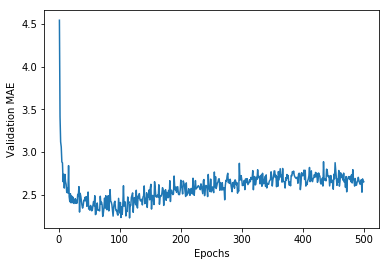

In [45]:
plt.plot(range(1,len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [47]:
# Function that generates a smooth curve
def smooth_curve(points,factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

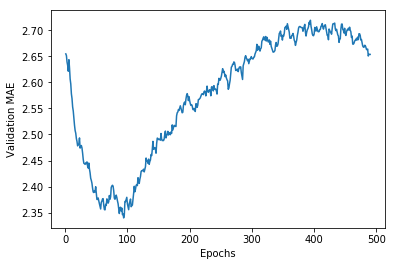

In [49]:
# Put the smoothed data
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()